In [1]:
%pwd

'c:\\Users\\Prarthana\\Desktop\\projects\\hate_speech\\hate_speech_classification\\notebook'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import pad_sequences
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 255)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prarthana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data1 = pd.read_csv("C:/Users/Prarthana/Desktop/projects/datasets/hate_speech/train.csv")
data1.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


<AxesSubplot:xlabel='label', ylabel='count'>

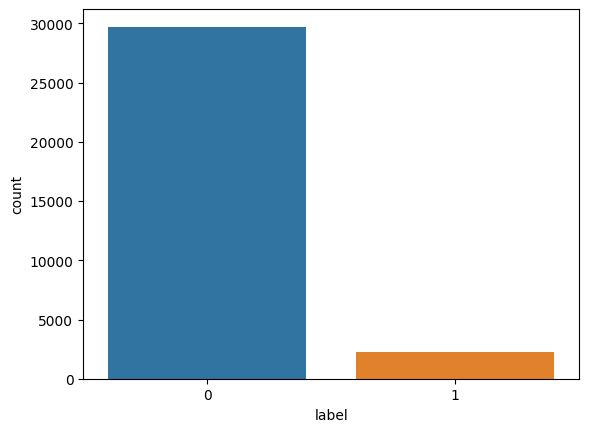

In [3]:
sns.countplot(x='label',data = data1)

In [4]:
data2 = pd.read_csv("C:/Users/Prarthana/Desktop/projects/datasets/hate_speech/labeled_data.csv")
data2.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"""
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"""
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; thats that """
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch"


<AxesSubplot:xlabel='class', ylabel='count'>

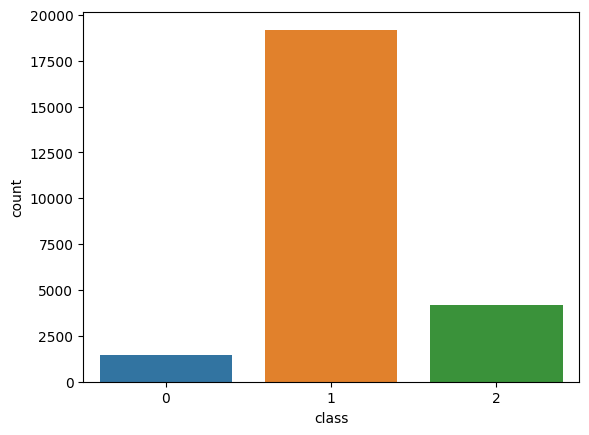

In [5]:
sns.countplot(x='class',data = data2)

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
#drop  unnecessary columns
data2.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)
data2.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [8]:
data2[data2['class']==0]['class']=1

C:\Users\Prarthana\AppData\Local\Temp\ipykernel_9784\3023221475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[data2['class']==0]['class']=1


In [9]:
# replace the value of 0 to 1
data2["class"].replace({0:1},inplace=True)

In [10]:
#check unique values in the class column
data2['class'].unique()

array([2, 1], dtype=int64)

<AxesSubplot:xlabel='class', ylabel='count'>

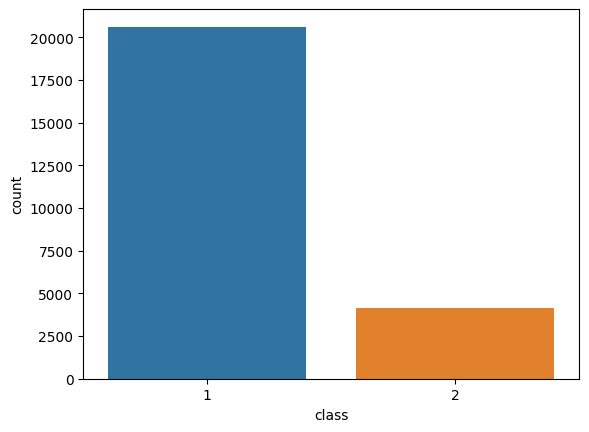

In [11]:
sns.countplot(x='class',data = data2)

In [12]:
#1 - hate , 2 - no hate
#replace value 2 to 0 in data2
data2["class"].replace({2:0}, inplace = True)

<AxesSubplot:xlabel='class', ylabel='count'>

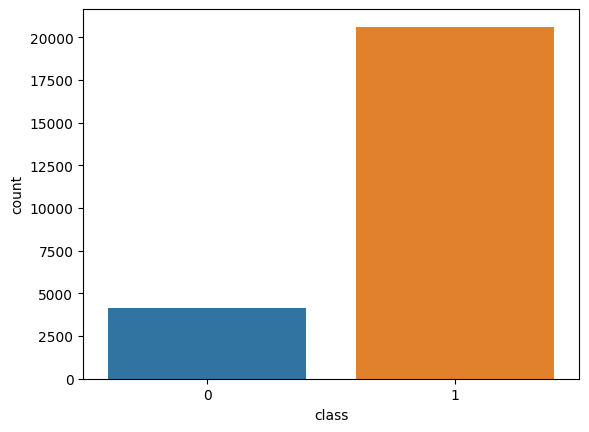

In [13]:
sns.countplot(x='class',data=data2)
#now 0-no hate 1-hate

In [14]:
data2.rename(columns={'class':'label'},inplace =True)

In [15]:
# Let's concatinate both the data into a single data frame.
frame = [data1, data2]
df = pd.concat(frame)
df.head()

,id,label,tweet
0,1.0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2.0,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3.0,0,bihday your majesty
3,4.0,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5.0,0,factsguide: society now #motivation


In [16]:
#drop id column
df.drop('id', axis=1, inplace=True)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0,factsguide: society now #motivation


<AxesSubplot:xlabel='label', ylabel='count'>

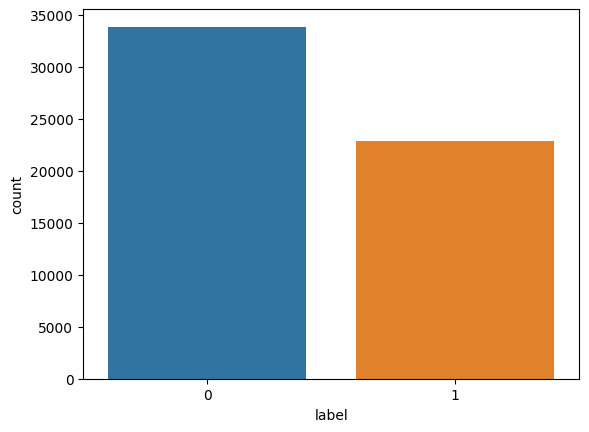

In [17]:
sns.countplot(x='label',data=df)

In [18]:
df.shape

(56745, 2)

In [19]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [20]:
# Let's apply regex and do cleaning. 
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [21]:
#apply data cleaning on data
df['tweet']=df['tweet'].apply(data_cleaning)
df["tweet"][3]

3    model   i love u take with u all the time in urð± ðððð
ð¦ð¦ð¦   model   i love u take with u all the time in urð± ðððð
ð¦ð¦ð¦   model   i love u take with u all the time in urð± ðððð
ð¦ð¦ð¦   mo...
3     rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cgander...
Name: tweet, dtype: object

In [22]:
df.head()

,label,tweet
0,0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run user when a father is dysfunctional and is so self...
1,0,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthank user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthank user user thanks for lyft...
2,0,bihday your majesti bihday your majesti bihday your majesti bihday your majesti bihday your majesti
3,0,model i love u take with u all the time in urð± ðððð ð¦ð¦ð¦ model i love u take with u all the time in urð± ðððð ð¦ð¦ð¦ model i love u take with u all the time in urð± ðððð ð¦ð¦ð¦ mo...
4,0,factsguide society now motiv factsguide society now motiv factsguide society now motiv factsguide society now motiv factsguide society now motiv factsguide society now motiv factsguide society now motiv factsguide society ...


In [23]:
x = df['tweet']
y = df['label']

In [24]:
# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


In [25]:
type(x_test), type(y_test), type(x_train), type(y_train)

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [26]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [27]:
# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# starting model training

history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1, validation_split=0.2,callbacks=[stop, checkpoint])